<a href="https://colab.research.google.com/github/HaydenJF/CPSC392-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**BACKGROUND**

My original project was on COVID case studies, so when starting the initial part of this project, it's a lot to do with data cleaning. The CDC data is really hard to clean. They have a lot of variables and you have to dummy a lot of variables because the CDC can condense a lot of information. But the problem with this is that. It can take a very long time to clean like you. I didn't notice some of the issues with the original data that I had.  For example, the first 50% or of the data didn't have age groups, 12 to 17, and the second half did, which basically meant that I couldn't use the case data for the project. So my project then became the quickest dataset that you can find with COVID 19. And the best one I could find was COVID death rates. 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # simple TT split cv

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LassoCV

import numpy as np

%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HaydenJF/CPSC392-Final-Project/main/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,998698.0,7955604.0,887976.0,515907.0,11255.0,1380381.0,NaN
1,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,Under 1 year,275.0,44604.0,557.0,35.0,30.0,826.0,NaN
2,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,0-17 years,1045.0,79133.0,1604.0,276.0,216.0,2583.0,NaN
3,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,1-4 years,138.0,8356.0,327.0,32.0,75.0,506.0,NaN
4,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,5-14 years,334.0,13227.0,462.0,107.0,86.0,773.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90877,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,50-64 years,NaN,NaN,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
90878,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,55-64 years,NaN,NaN,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
90879,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,65-74 years,0.0,12.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
90880,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,75-84 years,0.0,22.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...


In [ ]:
print(*df.columns, sep = "\n")

Data As Of
Start Date
End Date
Group
Year
Month
State
Sex
Age Group
COVID-19 Deaths
Total Deaths
Pneumonia Deaths
Pneumonia and COVID-19 Deaths
Influenza Deaths
Pneumonia, Influenza, or COVID-19 Deaths
Footnote


In [ ]:
df.drop('Footnote', inplace=True, axis=1)

In [ ]:
print(df.isnull().sum())
df.dropna(inplace = True)

Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         2754
Month                                       11016
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                             23003
Total Deaths                                13283
Pneumonia Deaths                            27184
Pneumonia and COVID-19 Deaths               22438
Influenza Deaths                            15768
Pneumonia, Influenza, or COVID-19 Deaths    26430
dtype: int64


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11016,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,All Ages,6.0,264677.0,17909.0,3.0,2125.0,20037.0
11017,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1784.0,41.0,0.0,8.0,49.0
11018,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,0-17 years,0.0,2966.0,90.0,0.0,63.0,153.0
11019,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0
11020,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,5-14 years,0.0,471.0,21.0,0.0,29.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90868,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,1-4 years,0.0,0.0,0.0,0.0,0.0,0.0
90869,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,5-14 years,0.0,0.0,0.0,0.0,0.0,0.0
90870,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,15-24 years,0.0,0.0,0.0,0.0,0.0,0.0
90871,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,Puerto Rico,Female,18-29 years,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df[(df["State"] == "United States") & (df["Sex"] != "All Sexes") & (df["Age Group"] != "All Ages")]
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11034,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,Under 1 year,0.0,955.0,24.0,0.0,4.0,28.0
11035,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,0-17 years,0.0,1670.0,50.0,0.0,36.0,86.0
11036,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,1-4 years,0.0,166.0,10.0,0.0,13.0,23.0
11037,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,5-14 years,0.0,271.0,12.0,0.0,15.0,27.0
11038,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,15-24 years,0.0,1889.0,40.0,0.0,12.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,50-64 years,12.0,774.0,36.0,2.0,0.0,46.0
12491,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,55-64 years,8.0,625.0,31.0,2.0,0.0,37.0
12492,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,65-74 years,31.0,1192.0,76.0,10.0,2.0,99.0
12493,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,75-84 years,49.0,1844.0,112.0,17.0,4.0,148.0


In [ ]:
df = df[(df["Age Group"] == "0-17 years") | 
        (df["Age Group"] == "18-29 years") | 
        (df["Age Group"] == "30-39 years") | 
        (df["Age Group"] == "40-49 years") | 
        (df["Age Group"] == "50-64 years") | 
        (df["Age Group"] == "65-74 years") | 
        (df["Age Group"] == "75-84 years") | 
        (df["Age Group"] == "85 years and over")]

dummies1 = pd.get_dummies(df["Age Group"])
dummies1

,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years,85 years and over
11035,1,0,0,0,0,0,0,0
11039,0,1,0,0,0,0,0,0
11041,0,0,1,0,0,0,0,0
11043,0,0,0,1,0,0,0,0
11045,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
12488,0,0,0,1,0,0,0,0
12490,0,0,0,0,1,0,0,0
12492,0,0,0,0,0,1,0,0
12493,0,0,0,0,0,0,1,0


In [ ]:
df.head()
df["total_month"] = (df["Year"]*12+df["Month"])-(12*2020)
dummies2 = pd.get_dummies(df["Sex"])
df = pd.concat([df,dummies2], axis = 1)
dummies3 = pd.get_dummies(df["Age Group"])
df = pd.concat([df,dummies3], axis = 1)

df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,...,Female,Male,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years,85 years and over
11035,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,0-17 years,0.0,...,0,1,1,0,0,0,0,0,0,0
11039,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,18-29 years,0.0,...,0,1,0,1,0,0,0,0,0,0
11041,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,30-39 years,0.0,...,0,1,0,0,1,0,0,0,0,0
11043,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,40-49 years,0.0,...,0,1,0,0,0,1,0,0,0,0
11045,05/11/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,50-64 years,1.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,40-49 years,1.0,...,1,0,0,0,0,1,0,0,0,0
12490,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,50-64 years,12.0,...,1,0,0,0,0,0,1,0,0,0
12492,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,65-74 years,31.0,...,1,0,0,0,0,0,0,1,0,0
12493,05/11/2022,05/01/2022,05/07/2022,By Month,2022.0,5.0,United States,Female,75-84 years,49.0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
db = df.copy(deep=True)

db.drop('Data As Of', inplace=True, axis=1)
db.drop('Start Date', inplace=True, axis=1)
db.drop('End Date', inplace=True, axis=1)
db.drop('Group', inplace=True, axis=1)
db.drop('Year', inplace=True, axis=1)
db.drop('Month', inplace=True, axis=1)
db.drop('State', inplace=True, axis=1)
db.drop('Age Group', inplace=True, axis=1)
db.drop('Sex', inplace=True, axis=1)

db.drop('Pneumonia and COVID-19 Deaths', inplace=True, axis=1)
db.drop('Pneumonia, Influenza, or COVID-19 Deaths', inplace=True, axis=1)



db

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,total_month,Female,Male,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years,85 years and over
11035,0.0,1670.0,50.0,36.0,1.0,0,1,1,0,0,0,0,0,0,0
11039,0.0,3231.0,75.0,26.0,1.0,0,1,0,1,0,0,0,0,0,0
11041,0.0,4310.0,138.0,49.0,1.0,0,1,0,0,1,0,0,0,0,0
11043,0.0,6097.0,261.0,83.0,1.0,0,1,0,0,0,1,0,0,0,0
11045,1.0,26107.0,1430.0,282.0,1.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,1.0,155.0,6.0,0.0,29.0,1,0,0,0,0,1,0,0,0,0
12490,12.0,774.0,36.0,0.0,29.0,1,0,0,0,0,0,1,0,0,0
12492,31.0,1192.0,76.0,2.0,29.0,1,0,0,0,0,0,0,1,0,0
12493,49.0,1844.0,112.0,4.0,29.0,1,0,0,0,0,0,0,0,1,0


**DATA CLEANING**

The initial process of the pre cleaning was basically getting down this 90,000 rows to a more manageable number. I initially removed all the footnote data along with every single variable that had a null in it, which brought it down all the way to 29,000. I then removed all ages so that the data was as specific as possible. I could have technically chosen to do a specific state, but I decided to use the entire United States.  That got rid of 50 different states worth of data points and to get down to 928 rows. Another thing I did was they actually had two different sets of ages. I basically cleaned it out so that I had an entire system for every single age group, and that got me down to 460 rows for a much more reasonable number. From there, I added dummy variables so that all my continuous variables, removed strings and changed the dates to a continuous month variable.  I also decided to get rid of multi value data. 

[0.30587229829805407, 0.36949762122571655, 0.30742064613436776, 0.40947142283769294, 0.47407080437344756, 0.5196049346258035, 0.6265297859462092, 0.6846499463217645, 0.7082849476018293, 0.7671934974180569, 0.7714012685169074, 0.7934982851350108, 0.8121814163797386, 0.8229855972777613, 0.8105458795777364, 0.8574607026167367, 0.8715252398807879, 0.8846538474006794, 0.8928234721820624]


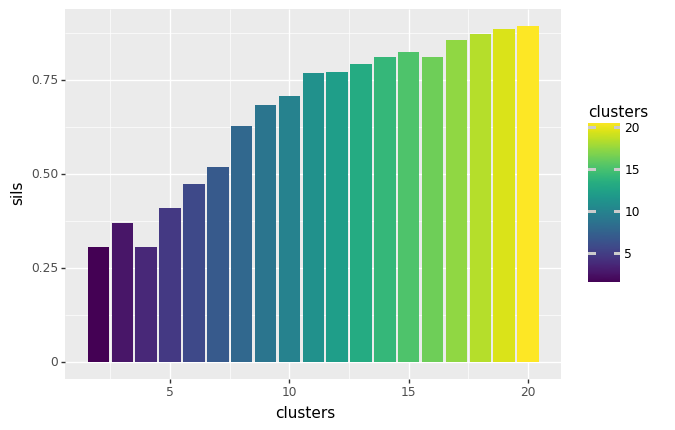

<ggplot: (8776064817557)>

In [ ]:
cont = ["COVID-19 Deaths", "Total Deaths", "Pneumonia Deaths", "Influenza Deaths", "total_month"]

X = db.copy(deep=True)
db1 = db.copy(deep=True)

z = StandardScaler()

X[cont] = z.fit_transform(X[cont])

X = X

sils = []
for n in range(2,21):
    EM = GaussianMixture(n_components = n)
    EM.fit(X)
    colName = str(n) + " clusters"
    clusters = EM.predict(X)
    
    X[colName] = clusters
    db1[colName] = clusters
    sils.append(silhouette_score(X, clusters))
    
print(sils)
s = pd.DataFrame({"sils": sils, "clusters": range(2,21)})
#print(ggplot(s, aes(x = "range", y = "sils")) 
#      + geom_bar()
#      + theme_minimal())
(ggplot(s, aes(x = "clusters", y = "sils", fill = "clusters")) + 
stat_summary(fun_data = "mean_sdl", geom = "bar"))

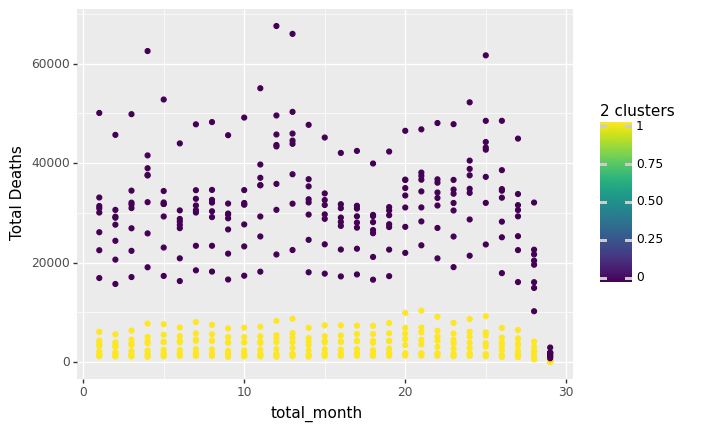

<ggplot: (8776065377249)>


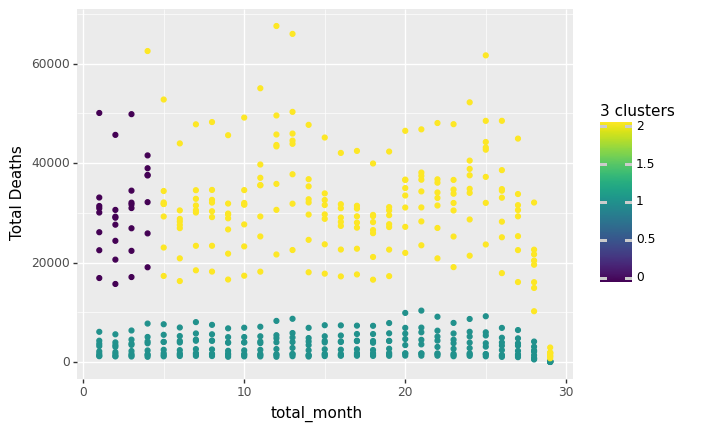

<ggplot: (8776064929673)>


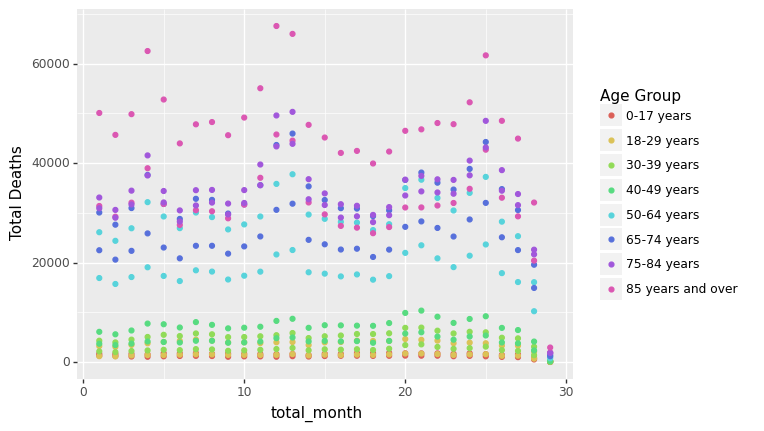

<ggplot: (8776065536601)>


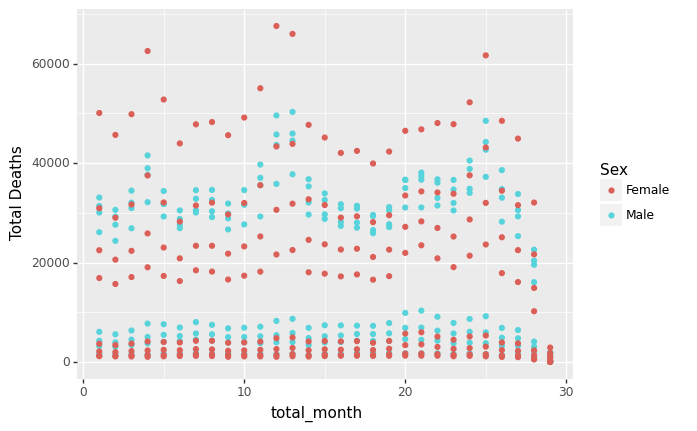

<ggplot: (8776065702185)>


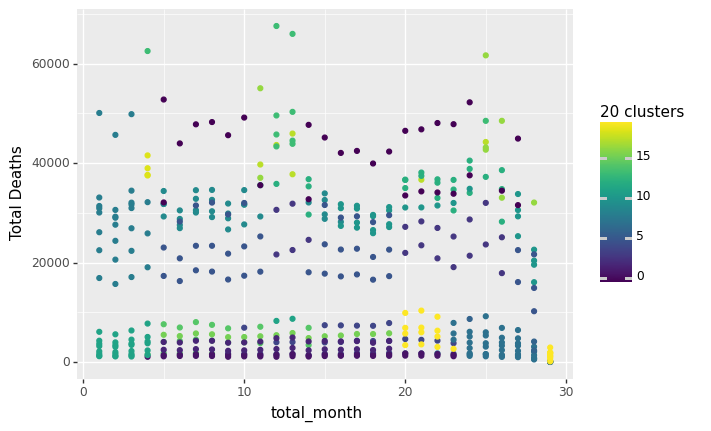

<ggplot: (8776065781457)>


In [ ]:
print(ggplot(db1, aes(x = "total_month", y = "Total Deaths", color = "2 clusters")) 
      + geom_point())

print(ggplot(db1, aes(x = "total_month", y = "Total Deaths", color = "3 clusters")) 
      + geom_point())


db1 = pd.concat([db1,df["Age Group"]], axis = 1)


print(ggplot(db1, aes(x = "total_month", y = "Total Deaths", color = "Age Group")) 
      + geom_point())

db1 = pd.concat([db1,df["Sex"]], axis = 1)

print(ggplot(db1, aes(x = "total_month", y = "Total Deaths", color = "Sex")) 
      + geom_point())

print(ggplot(db1, aes(x = "total_month", y = "Total Deaths", color = "20 clusters")) 
      + geom_point())



**QUESTION 1**

My first question was a clustering question is it possible to cluster monthly deaths by sex and age effectively? And the answer was not really. An increase in clusters increases silhouette score linearly so clustering doesn’t actually help.  One thing that was really interesting, though, is that a three cluster silhouette score was better than the two cluster score. I want to look into that and it was actually really interesting. I broke down months vs. total deaths, based on sex and also based on age groups. And the crazy thing is that men ages 65-74 were dying less than women ages 75-84 but after April these numbers actually flipped and men started dying more than women 10 years older than them.

In [ ]:
db2 = db.copy(deep=True)
db2.drop("COVID-19 Deaths", inplace=True, axis=1)
dbf2 = db2.copy(deep=True)
lr = LinearRegression()


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(db2, 
                                                    db["COVID-19 Deaths"], 
                                                    test_size = 0.2, 
                                                    random_state = 42)
#42 is the answer to Life, The Universe and 
#Everything and this model is the question :)

#continous variables for Z scoring
continous_variables = ["Total Deaths", "Pneumonia Deaths", "Influenza Deaths", "total_month"]

z = StandardScaler()
    
z.fit(X_train[continous_variables])
X = db2  
X[continous_variables] = z.transform(db2[continous_variables])
X_train[continous_variables] = z.transform(X_train[continous_variables])
X_test[continous_variables] = z.transform(X_test[continous_variables])
    
# model
model = lr.fit(X_train, y_train)

print("Train R^2:")
print(model.score(X_train, y_train))
print("Test R^2:")
print(model.score(X_test, y_test))

Train R^2:
0.9651273587062748
Test R^2:
0.9676899182404666


0.965644951069239


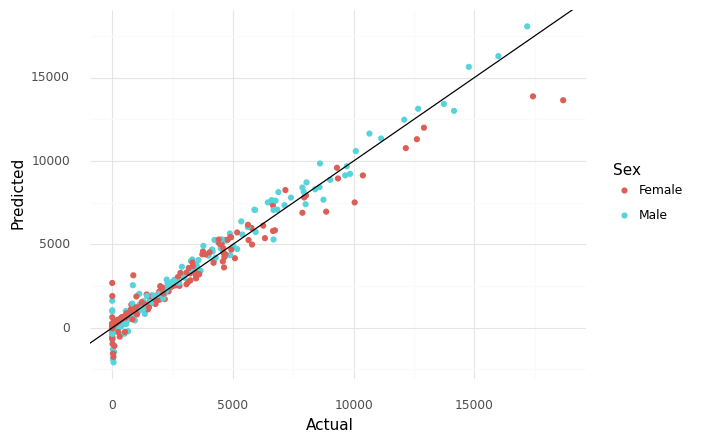

<ggplot: (8776065658733)>


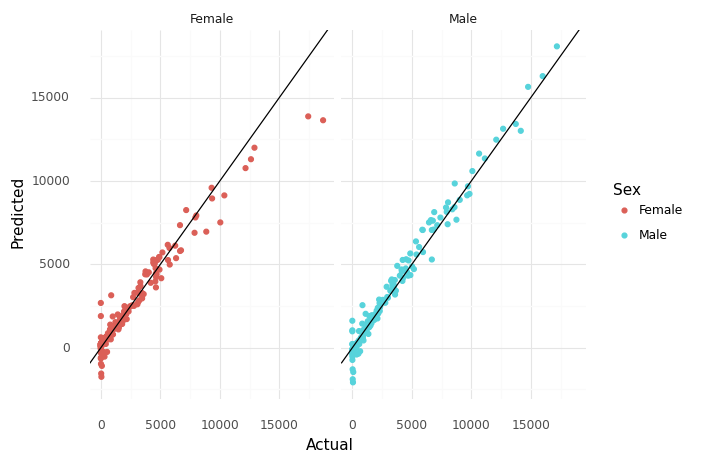

<ggplot: (8776065053093)>


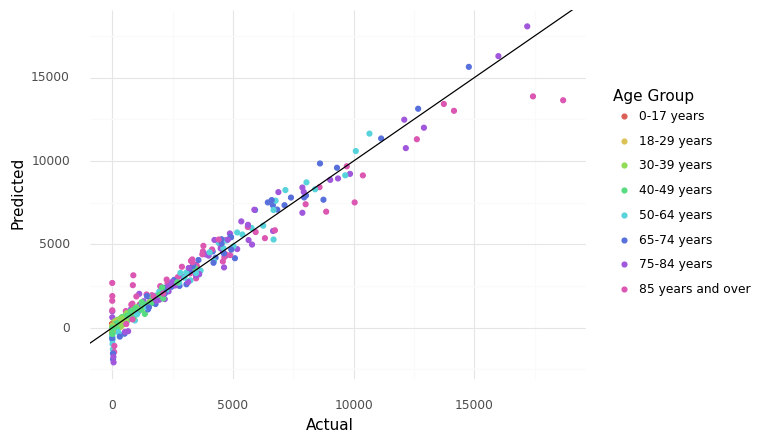

<ggplot: (8776065474637)>


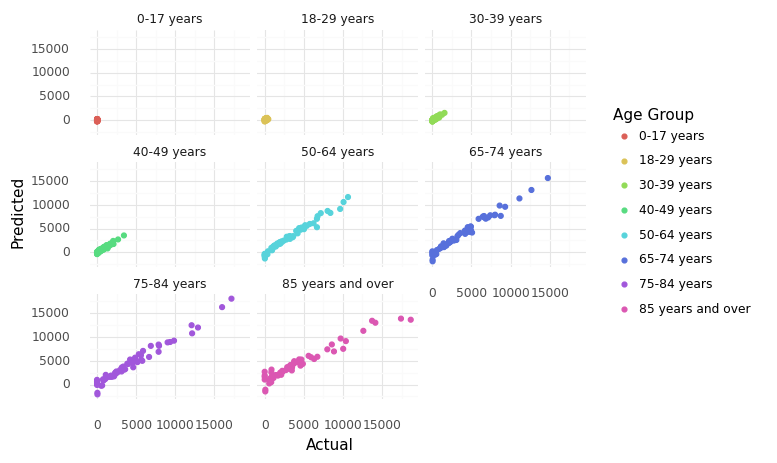

<ggplot: (8776065245749)>


In [ ]:
#actual vs predicted
#deaths (demographic) vs month
print(model.score(X, db["COVID-19 Deaths"]))
q2db = pd.DataFrame({"Actual": db["COVID-19 Deaths"],
                     "Predicted": model.predict(X)})

q2db = pd.concat([q2db,dbf2], axis = 1)
q2db = pd.concat([q2db,df["Sex"]], axis = 1)
q2db = pd.concat([q2db,df["Age Group"]], axis = 1)


q2db


print(ggplot(q2db, aes(x = "Actual", y = "Predicted", color = "Sex")) 
      + geom_point() 
      + theme_minimal() +
 geom_abline(slope=1, color ="black", intercept = 0))

print(ggplot(q2db, aes(x = "Actual", y = "Predicted", color = "Sex")) 
      + geom_point() 
      + theme_minimal() 
      + facet_wrap("~Sex") +
 geom_abline(slope=1, color ="black", intercept = 0))

print(ggplot(q2db, aes(x = "Actual", y = "Predicted", color = "Age Group")) 
      + geom_point() 
      + theme_minimal() +
 geom_abline(slope=1, color ="black", intercept = 0))

print(ggplot(q2db, aes(x = "Actual", y = "Predicted", color = "Age Group")) 
      + geom_point() 
      + theme_minimal() 
      + facet_wrap("Age Group"))

**QUESTION 2**

My next question was can linear regression predict covid death rate? And the answer is, Yeah, they both got a 96 R^2 score.  However, the issue with that is that there is some bias when it comes to different demographics. For example, with women, the model underpredicted their death rate. For men it would over predict. This also happened with age. Specifically ages 85+ our model under predicting the worst death rates in a month. The 85+ category actually looks like a logarithmic curve which is pretty horrible.  Wouldn’t want the CDC to use this model to try and determine how much medical attention women and older people would need because it severely undervalued them.

In [ ]:
db3 = db.copy(deep=True)
db3.drop("COVID-19 Deaths", inplace=True, axis=1)
dbf3 = db3.copy(deep=True)
lr = LinearRegression()


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(db3, 
                                                    db["COVID-19 Deaths"], 
                                                    test_size = 0.2, 
                                                    random_state = 42)
#42 is the answer to Life, The Universe and 
#Everything and this model is the question :)

#continous variables for Z scoring
continous_variables = ["Total Deaths", "Pneumonia Deaths", "Influenza Deaths", "total_month"]

z = StandardScaler()
    
z.fit(X_train[continous_variables])
X = db3  
X[continous_variables] = z.transform(db3[continous_variables])
X_train[continous_variables] = z.transform(X_train[continous_variables])
X_test[continous_variables] = z.transform(X_test[continous_variables])

# model
model = LassoCV(cv = 5).fit(X_train, y_train)

print("Train R^2:")
print(model.score(X_train, y_train))
print("Test R^2:")
print(model.score(X_test, y_test))

Train R^2:
0.9648706656563777
Test R^2:
0.9694997523380521


0.9657957465340063


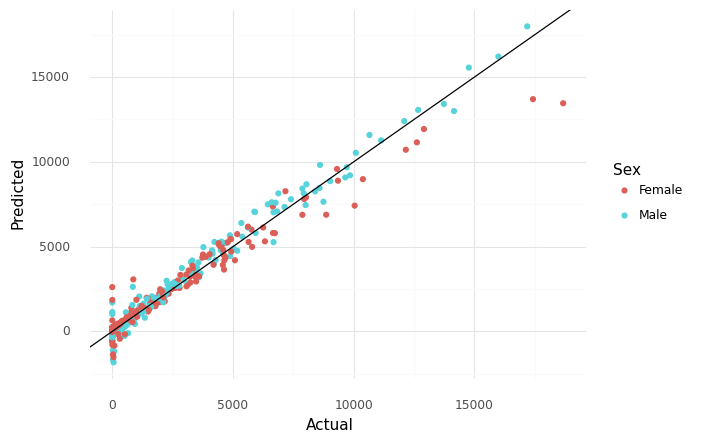

<ggplot: (8776065674437)>


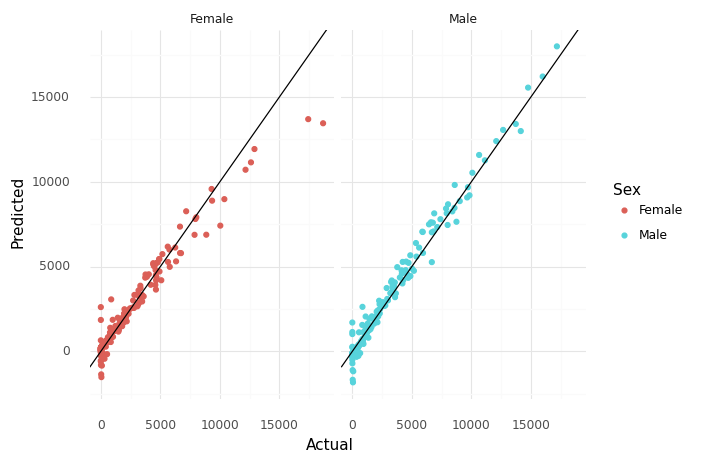

<ggplot: (8776064980933)>


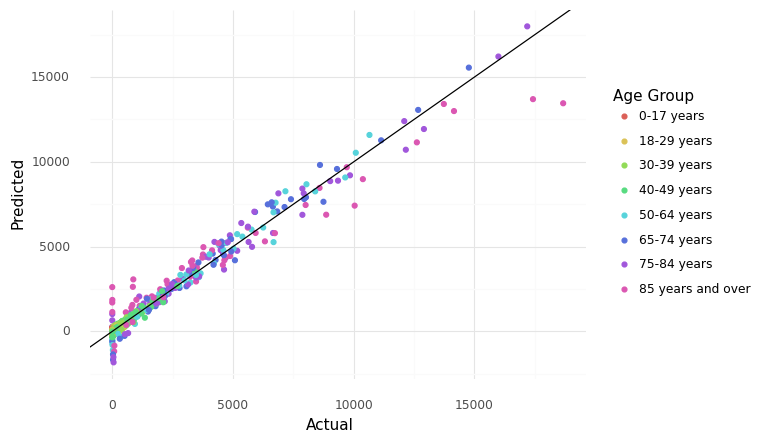

<ggplot: (8776065138869)>


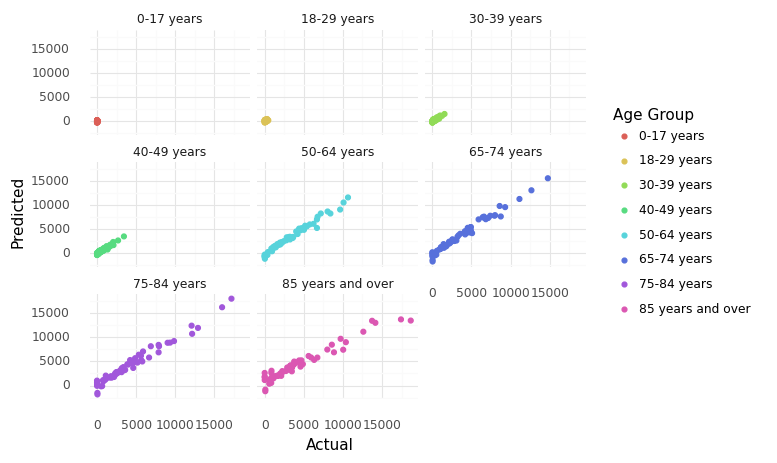

<ggplot: (8776064786565)>


In [ ]:
#actual vs predicted
#deaths (demographic) vs month
print(model.score(X, db["COVID-19 Deaths"]))
q3db = pd.DataFrame({"Actual": db["COVID-19 Deaths"],
                     "Predicted": model.predict(X)})

q3db = pd.concat([q3db,dbf3], axis = 1)
q3db = pd.concat([q3db,df["Sex"]], axis = 1)
q3db = pd.concat([q3db,df["Age Group"]], axis = 1)


q3db


print(ggplot(q3db, aes(x = "Actual", y = "Predicted", color = "Sex")) 
      + geom_point() 
      + theme_minimal() +
 geom_abline(slope=1, color ="black", intercept = 0))

print(ggplot(q3db, aes(x = "Actual", y = "Predicted", color = "Sex")) 
      + geom_point() 
      + theme_minimal() 
      + facet_wrap("~Sex") +
 geom_abline(slope=1, color ="black", intercept = 0))

print(ggplot(q3db, aes(x = "Actual", y = "Predicted", color = "Age Group")) 
      + geom_point() 
      + theme_minimal() +
 geom_abline(slope=1, color ="black", intercept = 0))

print(ggplot(q3db, aes(x = "Actual", y = "Predicted", color = "Age Group")) 
      + geom_point() 
      + theme_minimal() 
      + facet_wrap("Age Group"))

**QUESTION 3**

The last question was could LASSO reduce any bias shown by the linear regression model? And the answer was no.  The R^2 scores of both LASSO and normal linear regression were almost identical with LASSO doing worse sometimes.  Visually, the sex and age breakdowns look the exact same.  Again, I just wouldn’t recommend this model for predicting deaths, even with LASSO.

That's it.  Thanks for the great year :)

Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.